In [3]:
import numpy as np
import numpy.random as random
import scipy as sp
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()


In [8]:
# 7章総合問題7-2
# 1

In [17]:
file_name = r'chap3\online+retail\Online Retail.xlsx'
df = pd.read_excel(file_name)


  InvoiceNo StockCode                          Description  Quantity  \
0    536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1    536365     71053                  WHITE METAL LANTERN         6   
2    536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3    536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4    536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   

          InvoiceDate  UnitPrice  CustomerID         Country  
0 2010-12-01 08:26:00       2.55     17850.0  United Kingdom  
1 2010-12-01 08:26:00       3.39     17850.0  United Kingdom  
2 2010-12-01 08:26:00       2.75     17850.0  United Kingdom  
3 2010-12-01 08:26:00       3.39     17850.0  United Kingdom  
4 2010-12-01 08:26:00       3.39     17850.0  United Kingdom  


In [19]:
print(df.head())

  InvoiceNo StockCode                          Description  Quantity  \
0    536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1    536365     71053                  WHITE METAL LANTERN         6   
2    536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3    536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4    536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   

          InvoiceDate  UnitPrice  CustomerID         Country  
0 2010-12-01 08:26:00       2.55     17850.0  United Kingdom  
1 2010-12-01 08:26:00       3.39     17850.0  United Kingdom  
2 2010-12-01 08:26:00       2.75     17850.0  United Kingdom  
3 2010-12-01 08:26:00       3.39     17850.0  United Kingdom  
4 2010-12-01 08:26:00       3.39     17850.0  United Kingdom  


In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


In [27]:
df['cancel_flg'] = df.InvoiceNo.map(lambda x: str(x)[0])
print(df.groupby('cancel_flg').size())

cancel_flg
5    532618
A         3
C      9288
dtype: int64


In [29]:
is_cancel_flg = (df.cancel_flg == '5')
is_not_null = df.CustomerID.notnull()
# cancel_flgが5であり、かつCustomerIDがnullでないものだけを抽出する。
online_retail_data = df[is_cancel_flg & is_not_null]
online_retail_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 397924 entries, 0 to 541908
Data columns (total 9 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    397924 non-null  object        
 1   StockCode    397924 non-null  object        
 2   Description  397924 non-null  object        
 3   Quantity     397924 non-null  int64         
 4   InvoiceDate  397924 non-null  datetime64[ns]
 5   UnitPrice    397924 non-null  float64       
 6   CustomerID   397924 non-null  float64       
 7   Country      397924 non-null  object        
 8   cancel_flg   397924 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(5)
memory usage: 30.4+ MB


In [102]:
# 2
# CustomerIDのユニーク数
CustomerIDs = online_retail_data['CustomerID'].unique()
print('顧客ID数', len(CustomerIDs))

# バスケット数InvoiceNoのユニーク数
InvoiceNos = online_retail_data['InvoiceNo'].unique()
print('バスケット数', len(InvoiceNo))

# 商品の種類（StockCodeベース)
StockCodes = online_retail_data['StockCode'].unique()
print('商品の種類StockCodeベース', len(StockCodes))

# 商品の種類（Descriptionベースのユニーク数）
Descriptions = online_retail_data['Description'].unique()
print('商品の種類Descriptionベース', len(Descriptions))

顧客ID数 4339
バスケット数 18536
商品の種類StockCodeベース 3665
商品の種類Descriptionベース 3877


In [263]:
# 3

# 列に、その商品の購買金額の合計したものを追加。
online_retail_data.loc[:, 'TotalAmount'] = online_retail_data['Quantity'] * online_retail_data['UnitPrice']

# online_retail_data.head()

# 国ごとに集計したものを新たに作る
country_total_amount_list = online_retail_data.groupby('Country')['TotalAmount'].sum()

# 降順にソートする
top_five_country =  country_total_amount_list.sort_values(ascending=False).head()
print(top_five_country)
print(top_five_country.index)

Country
United Kingdom    7308391.554
Netherlands        285446.340
EIRE               265545.900
Germany            228867.140
France             209024.050
Name: TotalAmount, dtype: float64
Index(['United Kingdom', 'Netherlands', 'EIRE', 'Germany', 'France'], dtype='object', name='Country')


In [265]:
# 4

# Country列に、top_five_country.indexに含まれる国名を値にもつ行を抽出
top_five_country_data = online_retail_data[online_retail_data["Country"].isin(top_five_country.index)]

# 国ごとかつ月ごとの時系列データが欲しい。なので、国、月で集計する
# まずは、国と日dateで集計する as_index=Falseにすることで、indexを数字にできる。それをかかないと、Countryの値がインデックスになってしまう。表にしたいのでindexを数字にする
country_date_data = top_five_country_data.groupby(['Country', 'InvoiceDate'], as_index=False)['TotalAmount'].sum()
print(country_date_data.head())
print()

# indexをInvoicedate,Countryにする。これで、unstackができるようにする。unstack()で動くのは、indexにしたものしか動かない。
# また、時系列データは、indexはDateのみにしたい。そうすればグラフが書きやすい。
country_date_data_index = country_date_data.set_index(['InvoiceDate', 'Country'])
print( country_date_data_index)
print()

# Countryを列にする。これで、InvoiceDateだけをindexにすることができ、時系列データになり、グラフ化できるようになる。
country_date_data_index_uns = country_date_data_index.unstack()
print(country_date_data_index_uns)
print()

# 月ごとに集計する。合計。
country_date_data_index_uns_month = country_date_data_index_uns.resample('ME').sum()
print(country_date_data_index_uns_month)

  Country         InvoiceDate  TotalAmount
0    EIRE 2010-12-01 14:05:00       555.38
1    EIRE 2010-12-02 16:33:00        22.50
2    EIRE 2010-12-03 11:48:00       322.20
3    EIRE 2010-12-03 14:04:00      1705.65
4    EIRE 2010-12-06 12:40:00       377.50

                                    TotalAmount
InvoiceDate         Country                    
2010-12-01 14:05:00 EIRE                 555.38
2010-12-02 16:33:00 EIRE                  22.50
2010-12-03 11:48:00 EIRE                 322.20
2010-12-03 14:04:00 EIRE                1705.65
2010-12-06 12:40:00 EIRE                 377.50
...                                         ...
2011-12-09 12:21:00 United Kingdom        29.88
2011-12-09 12:23:00 United Kingdom       124.60
2011-12-09 12:25:00 United Kingdom       140.64
2011-12-09 12:31:00 United Kingdom       329.05
2011-12-09 12:49:00 United Kingdom       339.20

[16811 rows x 1 columns]

                    TotalAmount                                           
Country        

<Axes: xlabel='InvoiceDate'>

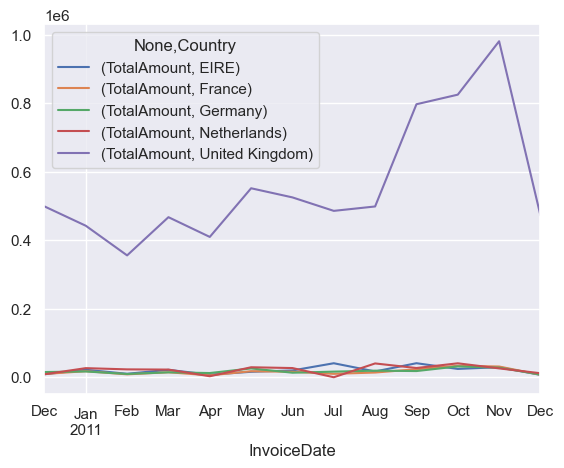

In [267]:
# 4グラフ化
country_date_data_index_uns_month.plot()

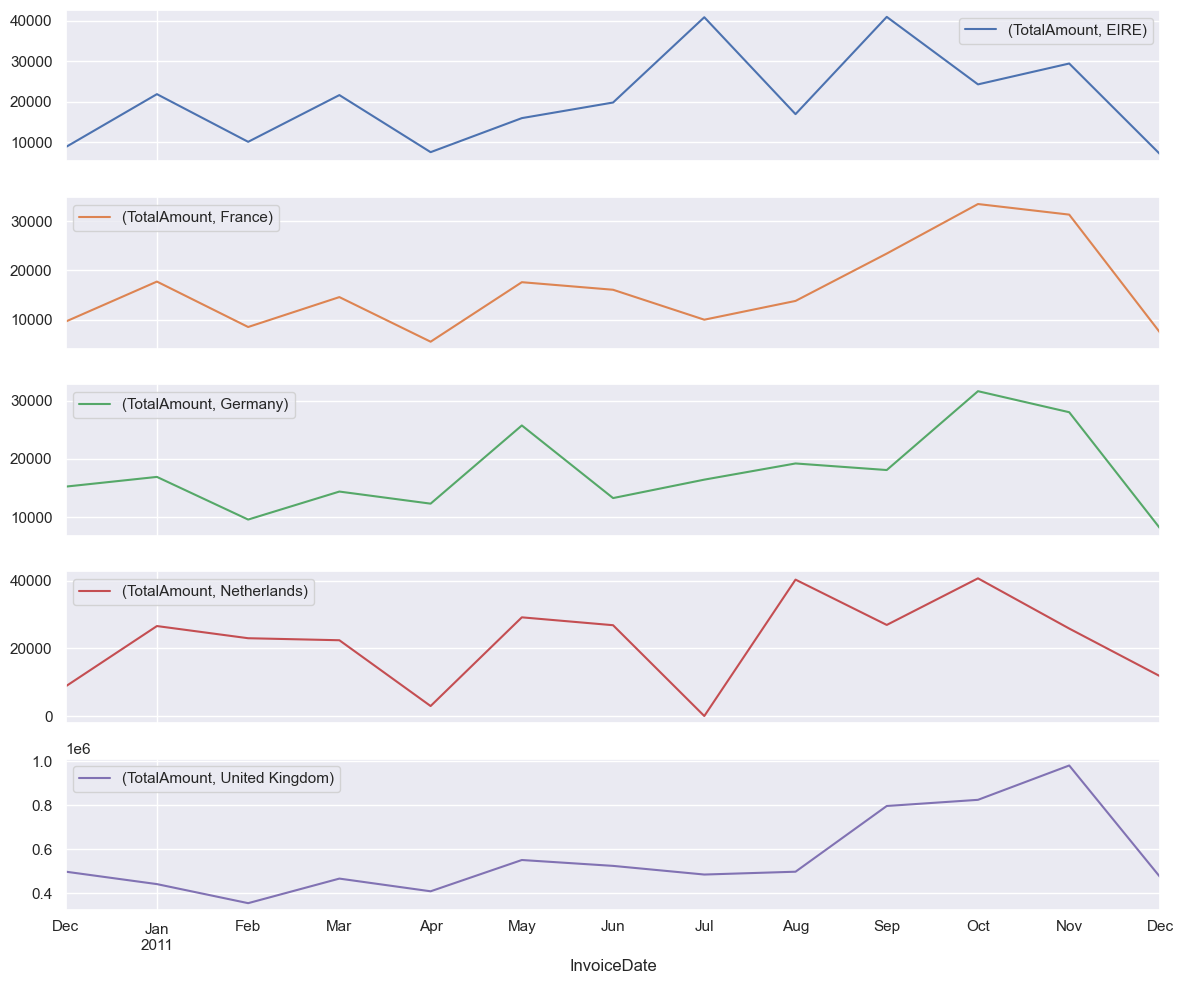

In [269]:
# 4グラフ化　バラバラ
country_date_data_index_uns_month.plot(subplots=True, figsize=(12,10))
plt.tight_layout()

Index(['United Kingdom', 'Netherlands', 'EIRE', 'Germany', 'France'], dtype='object', name='Country')


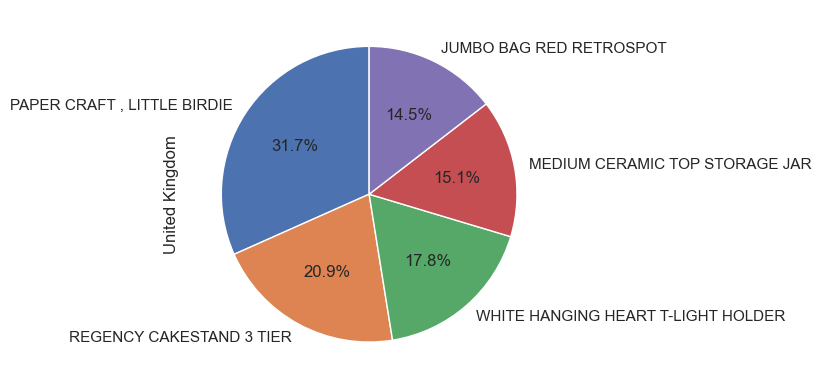

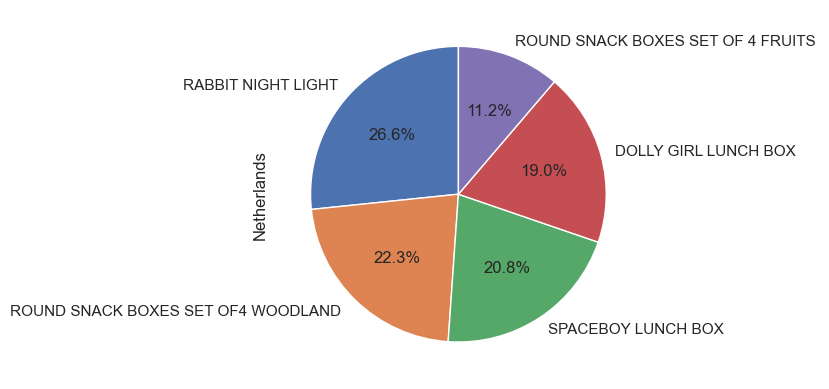

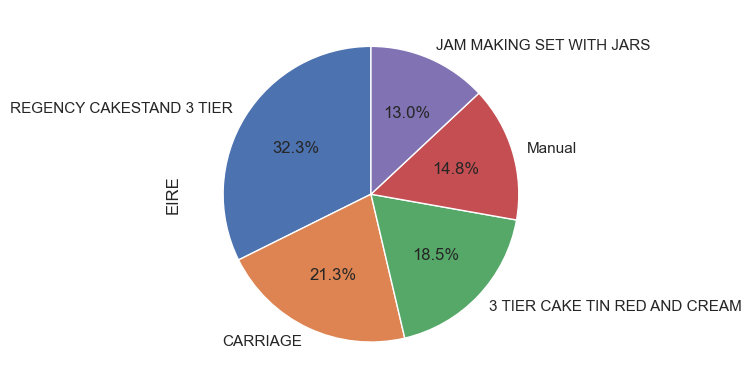

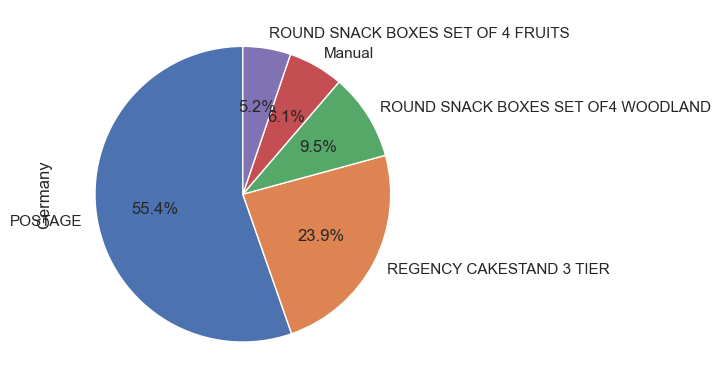

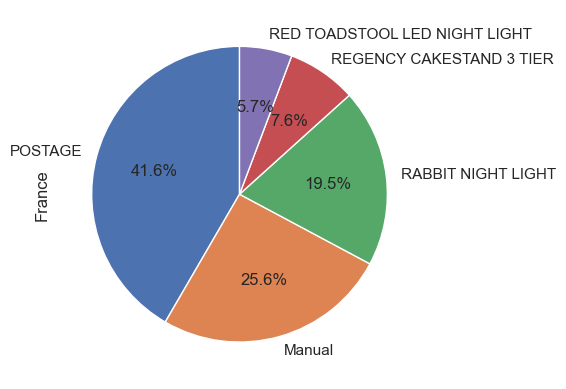

In [271]:
# 5

# まず1か所を固定して考えて、最後に固定を動かす

# # まずフランスのtop5の商品を抽出する。そして、それを円グラフにする。→for文で、top_five_country.indexにある要素ですべてそれを実行する。
# data_France = top_five_country_data[top_five_country_data['Country'] == 'France']
# print(data_France.head())
# print()

# # Descriptionで集計して、TotalAmountの合計を上位5だけ出す。
# top_five_France = data_France.groupby('Description')['TotalAmount'].sum().sort_values(ascending=False).head(5)
# print(top_five_France)

# # 円グラフにする
# plt.pie(top_five_France, labels=top_five_France.index, autopct='%1.1f%%', startangle=90)
# plt.ylabel('France')


# 上記の操作を、for文で実行する
print(top_five_country.index)
for country in top_five_country.index:
    # print(country)
    data_country = top_five_country_data[top_five_country_data['Country'] == country]
    top_five_country = data_country.groupby('Description')['TotalAmount'].sum().sort_values(ascending=False).head(5)

    plt.figure()
    plt.pie(top_five_country, labels=top_five_country.index, autopct='%1.1f%%', startangle=90)
    plt.ylabel(country)

In [337]:
# let'stry
customer_table_temp = online_retail_data.groupby('CustomerID', as_index=False)['TotalAmount'].sum().sort_values(ascending=False, by='TotalAmount')
customer_table = customer_table_temp.set_index('CustomerID')
print(customer_table.head())
print()
print(customer_table[customer_table['TotalAmount'] < 0])
print()

# --------------ビンの作成、分割

# pd.qcut()。
bin_labels = pd.qcut(customer_table["TotalAmount"], q=10)

# グループ化
customer_table_bin = customer_table.groupby(bin_labels).sum()
print(customer_table_bin)

# ーーーーーーーーーーーーーーービンの作成終了

# 売上合計
total_sales = customer_table_bin["TotalAmount"].sum()

# 各グループの売上の割合を計算
customer_table_bin["Percentage"] = (customer_table_bin["TotalAmount"] / total_sales) 

print(customer_table_bin)

            TotalAmount
CustomerID             
14646.0       280206.02
18102.0       259657.30
17450.0       194550.79
16446.0       168472.50
14911.0       143825.06

Empty DataFrame
Columns: [TotalAmount]
Index: []

                       TotalAmount
TotalAmount                       
(-0.001, 156.566]        45944.160
(156.566, 250.106]       87145.480
(250.106, 351.658]      132117.870
(351.658, 489.724]      179857.951
(489.724, 674.45]       252901.481
(674.45, 941.942]       343792.411
(941.942, 1353.74]      493107.450
(1353.74, 2057.914]     727103.640
(2057.914, 3646.164]   1180055.001
(3646.164, 280206.02]  5469382.460
                       TotalAmount  Percentage
TotalAmount                                   
(-0.001, 156.566]        45944.160    0.005156
(156.566, 250.106]       87145.480    0.009779
(250.106, 351.658]      132117.870    0.014826
(351.658, 489.724]      179857.951    0.020183
(489.724, 674.45]       252901.481    0.028380
(674.45, 941.942]       343792.4

C:\Users\utaka\AppData\Local\Temp\ipykernel_20760\3861825242.py:21: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  customer_table_bin = customer_table.groupby(bin_labels).sum()
